# Training Models

## Topics:
   * Linear Regression
       * Normal Equation
       * Gradient Descent
       * Batch Gradient Descent
       * Stochastic Gradient Descent
       * Mini-batch Gradient Descent
       * **Polynomial Regression**
       * Regularized Linear Models
           * *Ridge*
           * *Lasso*
           * *Elastic Net*
           * *Early Stopping*
   * Logistic Regression
   * Softmax Regression

**1. Linear Regression**

Linear Regression model prediction

$\hat{y}= \theta_{0} + \theta _{1}x_{1} +  \theta _{2}x_{2} + \cdot \cdot \cdot +\theta _{n}x_{n}$

Vectorized form

$\hat{y}= h_{\theta }(x) =  \theta \cdot x$

MSE cost function for a lineal regression model

$MSE(X,h_{\theta }) = \frac{1}{m}\sum_{1}^{m}(\theta ^{T}x^{(i)}-y^{(i)})^{2}$

**The Normal Equation**

There is _closed-form-solution_ that is a mathematical equation that gives the result directly but has a computational complexity about $O(n^{2.4})$ to $O(n^{3})$, so it`s usefull only in small datasets.

$\hat{\theta} = (X^{T}X)^{-1} X^{T}y$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)), X] #add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.60142754],
       [3.29498087]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add X0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.60142754],
       [10.19138928]])

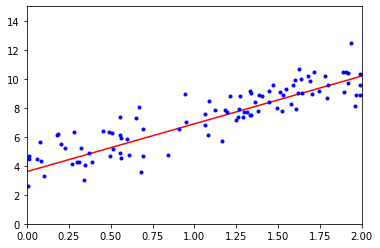

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# with Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.02399368]), array([[3.10699406]]))

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[ 7.73034704],
       [-0.39950841]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[ 7.73034704],
       [-0.39950841]])

**2. Gradient Descent**

To implement GD, we need to compute the gradient ot he cost function with regard to each model parameter $\theta_{j}$. In other words, calculate how much the cost function will change if we change the parameters just a little bit. (*Partial derivatives*)

$\frac{\partial }{\partial \theta _{j}}MSE(\theta ) = \frac{2}{m}\sum_{1}^{m}(\theta ^{T}x^{(i)}-y^{(i)})x_{j}^{(i)}$

$\theta ^{(next step)} = \theta - \eta \bigtriangledown _{\theta }MSE(\theta )$

In [10]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[ 7.58970931],
       [-0.27054505]])